# USA Super Store Dataset:

**Objectives:**
- Analyze monthly sales data, calculate key metrics (revenue, average order size ), and visulize trends over time.
- Identify top-selling products and categories.
- Analyze sales performance by region and customer segment.
- Provide insights and recommendations based on the analysis.

------------

## Import Libraries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

----------

## Load Dataset

In [3]:
df = pd.read_csv('D:/Bistartx Intership/Month-1/EDA_Super_Store_Sales/SuperStore.csv')
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
8450,8451,CA-2018-125451,23/10/2018,24/10/2018,First Class,AH-10075,Adam Hart,Corporate,United States,Cranston,Rhode Island,2920.0,East,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,2.220
1926,1927,US-2017-139710,09/06/2017,15/06/2017,Standard Class,GM-14680,Greg Matthias,Consumer,United States,Los Angeles,California,90045.0,West,TEC-PH-10001198,Technology,Phones,Avaya 4621SW VoIP phone,177.480
2400,2401,CA-2018-147361,09/09/2018,15/09/2018,Standard Class,SB-20290,Sean Braxton,Corporate,United States,Florence,South Carolina,29501.0,South,OFF-ST-10002214,Office Supplies,Storage,X-Rack File for Hanging Folders,56.450
9070,9071,CA-2018-147550,04/12/2018,05/12/2018,First Class,KE-16420,Katrina Edelman,Corporate,United States,Philadelphia,Pennsylvania,19134.0,East,FUR-FU-10001918,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder Wi...,11.352
3376,3377,CA-2016-161718,04/12/2016,10/12/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Hempstead,New York,11550.0,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,361.764


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

**Observations**
1. Change `Order Date`, `Ship Date` dtype into datetime.

----------

## Errors Handling

**Change dtype of order date, ship date to datetime**

In [6]:
date_columns = ['Order Date', 'Ship Date'] 

for col in date_columns:
    df[col] = pd.to_datetime(df[col], dayfirst = True)  
    df[col] = df[col].dt.date          
    df[col] = df[col].astype('datetime64[ns]') 

**Now the format is: format=Year/Month/Date**

In [7]:
df[['Order Date','Ship Date']].sample(5)

,Order Date,Ship Date
5286,2018-05-05,2018-05-06
2386,2018-03-25,2018-03-26
7364,2017-11-28,2017-12-04
8454,2017-04-18,2017-04-23
1895,2016-12-31,2017-01-04


In [8]:
df['Row ID'].nunique()

9800

**We already have the "Row ID" column in our dataset, so we set it as the index to organize the data efficiently**

In [9]:
df = df.set_index('Row ID')
df.index.name = None

In [10]:
df.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
1672,CA-2017-107615,2017-03-22,2017-03-25,First Class,RB-19645,Robert Barroso,Corporate,United States,North Las Vegas,Nevada,89031.0,West,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,58.58
8860,US-2018-114356,2018-08-20,2018-08-26,Standard Class,TT-21460,Tonja Turnell,Home Office,United States,Charlotte,North Carolina,28205.0,South,TEC-PH-10003171,Technology,Phones,Plantronics Encore H101 Dual Earpieces Headset,35.96
7284,CA-2018-169439,2018-09-09,2018-09-13,Standard Class,LC-17140,Logan Currie,Consumer,United States,Cleveland,Ohio,44105.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",25.92
1812,CA-2015-132612,2015-06-09,2015-06-11,Second Class,FO-14305,Frank Olsen,Consumer,United States,Harrisonburg,Virginia,22801.0,South,FUR-TA-10004534,Furniture,Tables,Bevis 44 x 96 Conference Tables,1441.30
2551,US-2016-128090,2016-08-16,2016-08-22,Standard Class,JM-15865,John Murray,Consumer,United States,Phoenix,Arizona,85023.0,West,OFF-LA-10000452,Office Supplies,Labels,Avery 488,5.04


**Since we already have Country, State, City, and Region columns, the Postal Code column is redundant and can be removed**

In [11]:
df.drop(columns=['Postal Code'], inplace=True)

In [12]:
df.sample()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
6244,CA-2017-165561,2017-11-24,2017-11-28,Standard Class,CR-12580,Clay Rozendal,Home Office,United States,Bellevue,Washington,West,OFF-SU-10004782,Office Supplies,Supplies,"Elite 5"" Scissors",25.35


---------

## Summary of Data: 

In [13]:
for col in df.columns:
    print(f"Column {col}, Unique Values: {df[col].nunique()}")

Column Order ID, Unique Values: 4922
Column Order Date, Unique Values: 1230
Column Ship Date, Unique Values: 1326
Column Ship Mode, Unique Values: 4
Column Customer ID, Unique Values: 793
Column Customer Name, Unique Values: 793
Column Segment, Unique Values: 3
Column Country, Unique Values: 1
Column City, Unique Values: 529
Column State, Unique Values: 49
Column Region, Unique Values: 4
Column Product ID, Unique Values: 1861
Column Category, Unique Values: 3
Column Sub-Category, Unique Values: 17
Column Product Name, Unique Values: 1849
Column Sales, Unique Values: 5757


In [14]:
for col in df.columns:
    print(f'{df[col].value_counts()}')

Order ID
CA-2018-100111    14
CA-2018-157987    12
CA-2017-165330    11
US-2017-108504    11
CA-2017-105732    10
                  ..
US-2016-110261     1
CA-2016-125710     1
US-2016-137960     1
CA-2016-124975     1
CA-2016-142202     1
Name: count, Length: 4922, dtype: int64
Order Date
2017-09-05    38
2017-11-10    35
2018-12-02    34
2018-12-01    34
2018-09-02    33
              ..
2017-02-25     1
2017-10-25     1
2015-02-21     1
2015-09-11     1
2016-05-09     1
Name: count, Length: 1230, dtype: int64
Ship Date
2018-09-26    34
2018-12-06    32
2016-12-16    31
2018-09-15    30
2018-09-06    30
              ..
2015-07-10     1
2016-03-29     1
2016-06-14     1
2018-01-10     1
2016-05-13     1
Name: count, Length: 1326, dtype: int64
Ship Mode
Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64
Customer ID
WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
CK-12205    32
            ..
JR-15700     1


**Summary of Data**

- **Shiping Modes = 4**
   - Standard class
   - Second class
   - First class
   - Same day
  
- **Segments = 3**
   - Consumer
   - Corporate
   - Home Office
  
- **Categories = 3**
   - Office Supplies
   - Furniture
   - Technology

- **Sub-Categories = 17**

- **Country = 1**
   - United States

- **States = 49**

- **Cities = 529**

- **Regions = 4**
   - West
   - East
   - Central
   - South
- **Orders = 9800**

- **Customers = 793**

- **Products = 1849**

-------------------

## Exploratory Data Analyysis

### Univarite Analysis

#### Date Columns

In [15]:
date_cols = ['Order Date','Ship Date']
for i in date_cols:
    print(f"{i}: Min = {df[i].min()}, Max = {df[i].max()}, Unique = {df[i].nunique()}")

Order Date: Min = 2015-01-03 00:00:00, Max = 2018-12-30 00:00:00, Unique = 1230
Ship Date: Min = 2015-01-07 00:00:00, Max = 2019-01-05 00:00:00, Unique = 1326


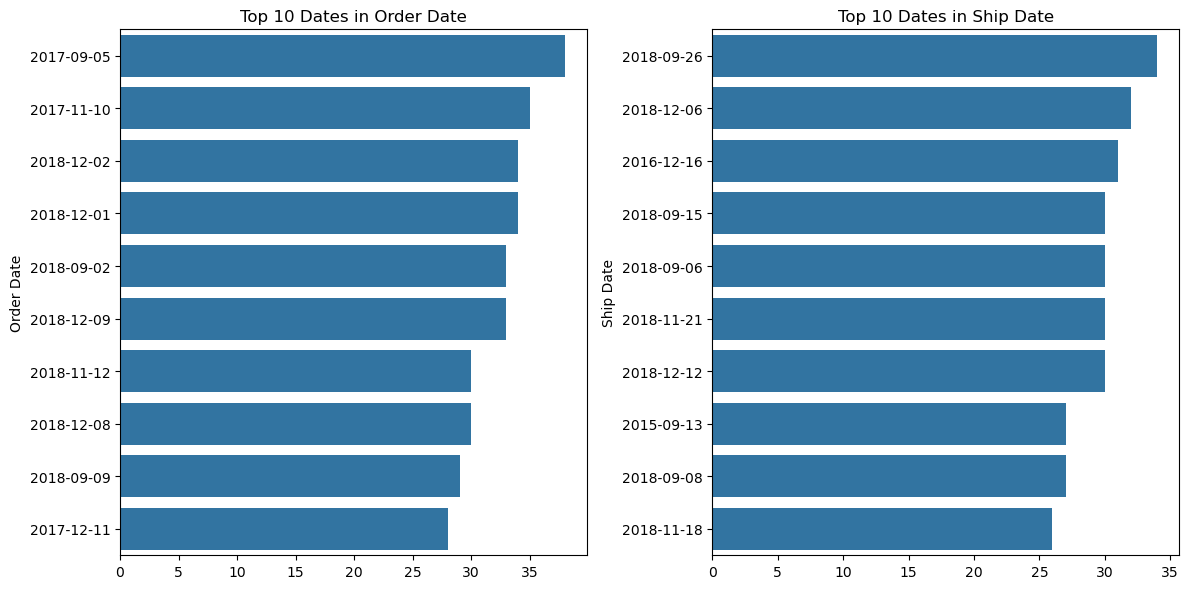

In [16]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(date_cols):  
    ax = plt.subplot(1, 2, i+1) 
    sns.barplot(y=df[col].value_counts().head(10).index, x=df[col].value_counts().head(10).values, ax=ax) 
    plt.title(f"Top 10 Dates in {col}")  

plt.tight_layout() 
plt.show()

**Observations**
- `Order` volume is highest from September to December.
- `Orders peak` from `September to Decembe`r due to holiday shopping, Black Friday, and Christmas demand.

In [17]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day
df['Order Weekday'] = df['Order Date'].dt.day_name()

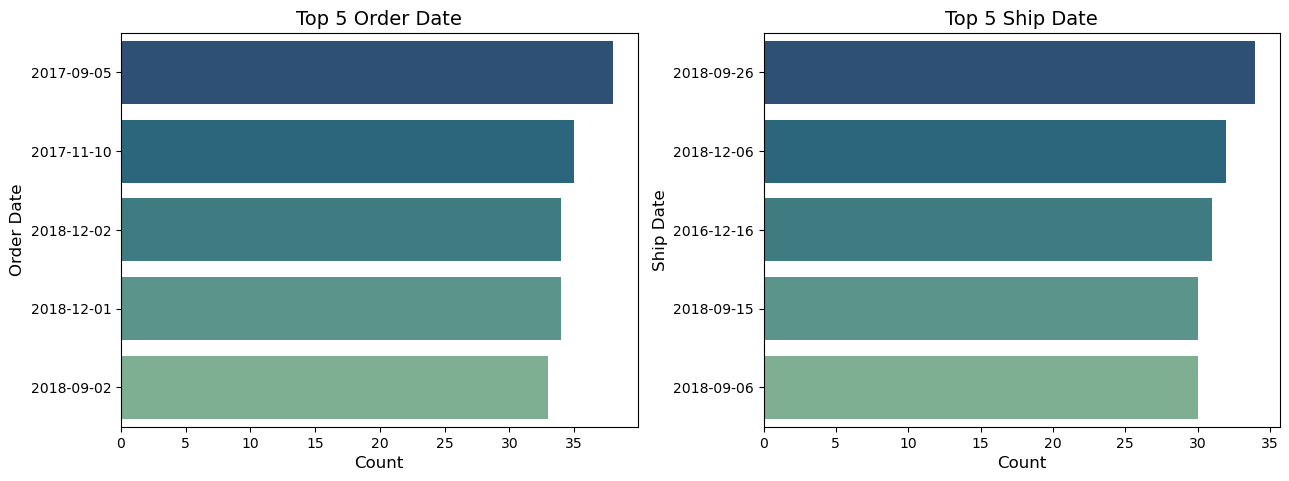

In [18]:
plt.figure(figsize=(13, 9)) 

for i, col in enumerate(date_cols, 1):
    ax = plt.subplot(2, 2, i)  

    top_5 = df[col].value_counts().head(5)
    sns.barplot(x=top_5.values, y=top_5.index, 
                ax=ax, orient='h', order=top_5.index,
                palette='crest_r')  

    ax.set_title(f"Top 5 {col}", fontsize=14)
    ax.set_xlabel("Count", fontsize=12)
    ax.set_ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()


---------

**Observations**
- Most orders were placed in `2018`.
- Order volume is highest from `September to December`.
- The busiest order days are the `20th–23rd, 26th, 2nd–5th, and 8th & 11th`.
- Orders peak on `Tuesdays, Saturdays, Sundays, and Mondays`.

-----------------

**Reasons**

**Most Orders Were Placed in 2018**
- The company might have expanded, gained more customers, or introduced new products.
- 2018 could have been a peak year for e-commerce or retail sales.

**Most Orders Were Placed Between September and December**
- Holiday Shopping Season: Sales surge due to Christmas, Thanksgiving, and New Year.
- Black Friday & Cyber Monday: Massive discounts in November drive purchases.
- Year-End Budgets: Businesses and individuals finalize purchases before the new year.

**Most Frequent Order Days: 2nd–5th, 8th, 11th, 20th–23rd, 26th**
- Payday Effect: Many people shop right after getting paid (often on the 1st or 15th of the month).
- Seasonal Events: Some dates may align with sales, promotions, or holidays.

**Most Orders Were Placed on Tuesdays, Saturdays, Sundays, and Mondays**
- Weekend Shopping: People have more time to shop on Saturdays and Sundays.
- Monday Back-to-Work Effect: Businesses may place bulk orders at the start of the week.
- Tuesday Discounts: Many e-commerce platforms and retailers launch deals on Tuesdays.
--------------------

#### Categorical Columns

In [19]:
df.select_dtypes(include='object').columns

Index(['Order ID', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Order Weekday'],
      dtype='object')

In [20]:
cat_cols = ['Ship Mode', 'Segment', 'Region', 'Category']

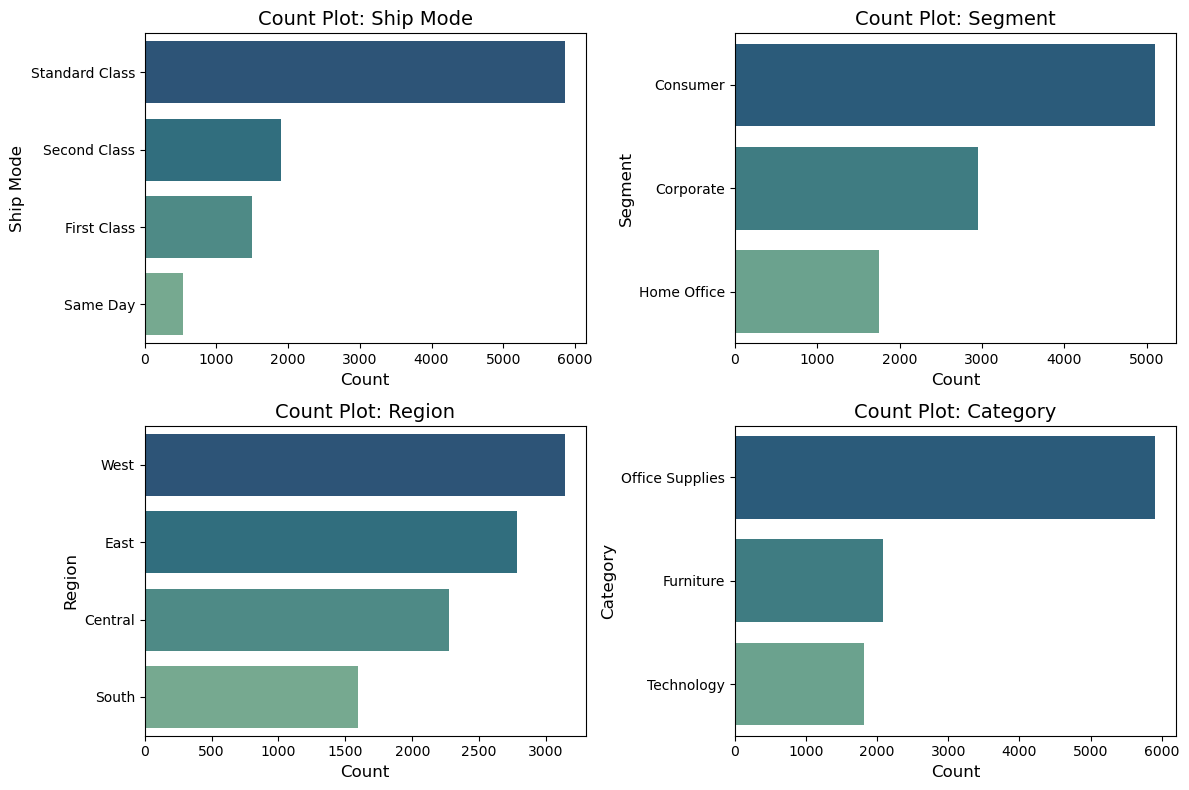

In [21]:
plt.figure(figsize=(12, 8)) 

for i, col in enumerate(cat_cols):
    ax = plt.subplot(2, 2, i+1)  

    sns.countplot(data=df, y=col,
                  order=df[col].value_counts().head().index,
                  palette= 'crest_r')  

    ax.set_title(f"Count Plot: {col}", fontsize=14)
    ax.set_xlabel("Count", fontsize=12)
    ax.set_ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

----------------
**Observations**
- `Standard Class` is the most popular shipping mode.
- The `West` region has the highest sales.
- `Consumer` segment has the highest sales.
- `Office Supplies` category has the highest sales.

**Reasons**

**`Standard Class` is the most popular shipping mode**
- Cost-Effective: Standard Class is usually the cheapest shipping option, making it attractive for customers who want to save money.
- Bulk Orders & Businesses: Businesses ordering office supplies or other products in bulk might not be in a rush, so they opt for cost-effective shipping.
- Wide Availability: Standard shipping is generally available for all locations, whereas faster options (like Same-Day or Next-Day) might be limited to specific areas.

**The `West` region has the highest sales**
- High Population & Business Hubs: The West region likely includes major cities with strong economies (e.g., California, Washington, etc.), leading to higher consumer demand.
- Tech & Corporate Influence: Many tech companies and startups operate in the West, increasing demand for office supplies and equipment.
- Higher Purchasing Power: Some Western states have a higher average income, leading to more discretionary spending.
- Strong Distribution Networks: Well-developed supply chain infrastructure might make it easier to fulfill orders quickly, encouraging more purchases.

**The `Consumer` segment has the highest sales**
- Larger Customer Base: The number of individual consumers is much higher than the number of businesses or government organizations.
- Frequent Small Purchases: Consumers often make frequent, smaller orders compared to businesses that order in bulk.
- Marketing & Discounts: Businesses might negotiate bulk discounts, but consumers often pay full price, increasing total revenue.
- Impulse Buying: Unlike businesses, consumers are more likely to make impulse purchases, leading to higher overall sales.

**`Office Supplies` category has the highest sales**
- Essential for Businesses & Individuals: Office supplies (e.g., pens, paper, notebooks) are used by both companies and individuals, ensuring consistent demand.
- Lower Price per Item → More Units Sold: Compared to furniture or electronics, office supplies are relatively cheap, so people buy them in larger quantities.
- Frequent Restocking: Unlike furniture or tech products, office supplies run out quickly, requiring frequent repurchasing.
- Schools & Institutions as Buyers: Schools, colleges, and government offices consistently buy office supplies, adding to the sales volume.
---------------------------------------



In [22]:
cat_cols = ['City','State','Sub-Category']

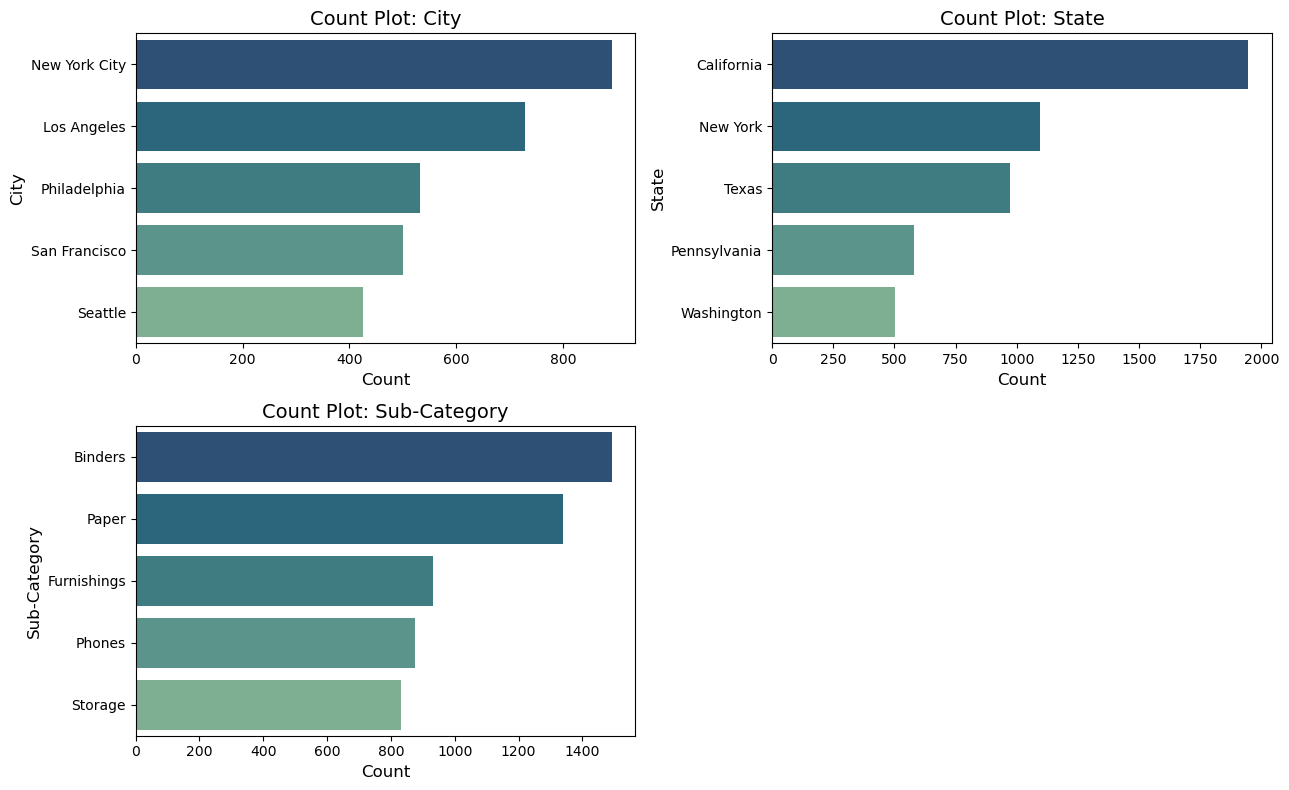

In [23]:
plt.figure(figsize=(13, 8))

for i, col in enumerate(cat_cols):
    ax = plt.subplot(2, 2, i+1)  

    sns.countplot(data=df, y=col, 
                  order=df[col].value_counts().head().index,
                  palette= 'crest_r')  

    ax.set_title(f"Count Plot: {col}", fontsize=14)
    ax.set_xlabel("Count", fontsize=12)
    ax.set_ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

-----------------
**Observations**
- Most of the `Orders` from `New York City` and `Los Angeles`.
- Most of the `Orders` from `California and New York state`.
- Most of the `Ordered` sub-categories are `Binders` and `Paper`.
  
**Reasons**
- The `New York City` and `Los Angeles` are the most populated cities in USA. So, the demand for `Binders` and `Paper` will be more.
- Both cities have large business districts, corporations, and startups that frequently order office supplies.
- These cities are major centers for online shopping, and residents are more likely to purchase online compared to smaller towns.
------------------

In [83]:
customer = ['Customer Name','Product Name']

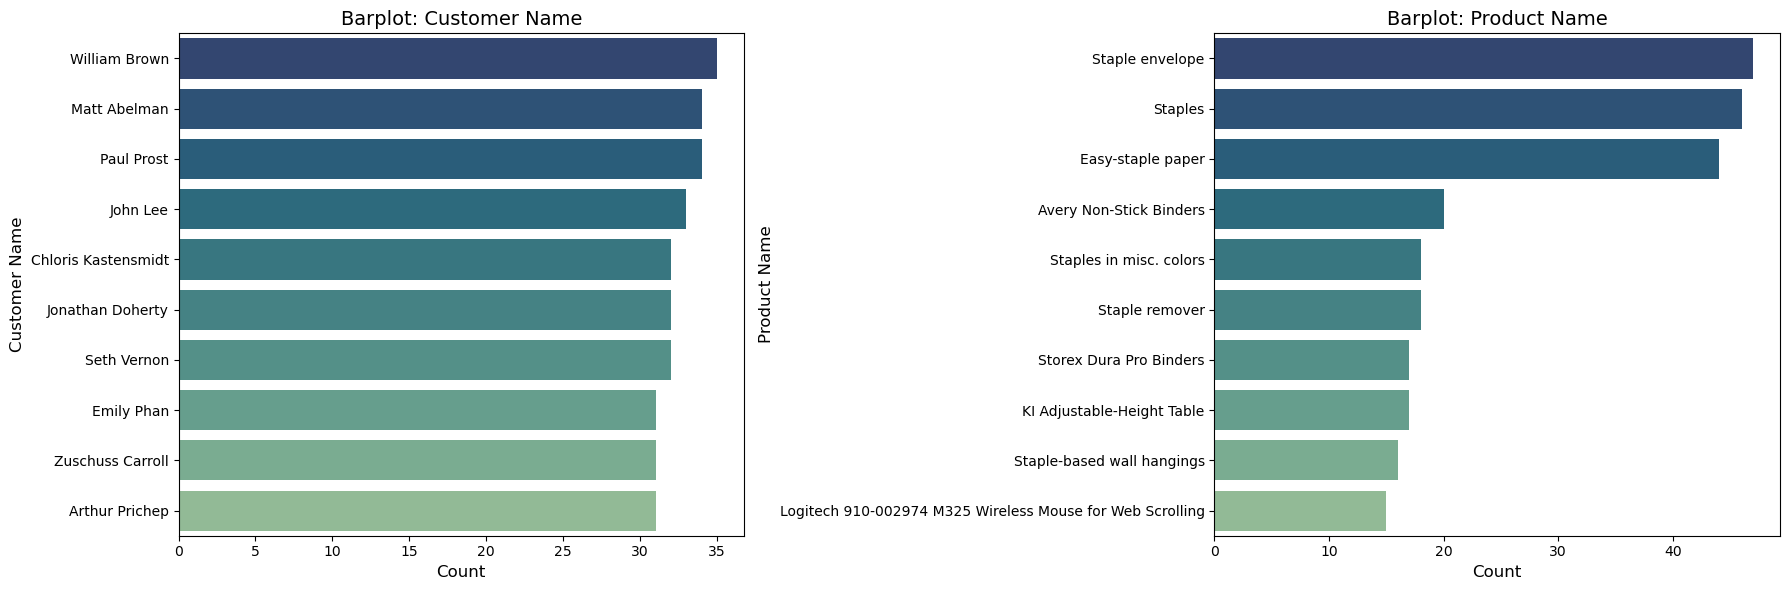

In [87]:
plt.figure(figsize=(18, 6))

for i, col in enumerate(customer):
    ax = plt.subplot(1,2,i+1)
    sns.barplot(y=df[col].value_counts().head(10).index, 
                x=df[col].value_counts().head(10).values, ax=ax,
                palette='crest_r') 
    
    ax.set_title(f"Barplot: {col}", fontsize=14)
    ax.set_xlabel("Count", fontsize=12)
    ax.set_ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

----------------
**Observations**
- `William Brown to Arthur Prichep` these 10 customers are the top buyers.
- The majority of purchases belong to `Paper and Office/School Work products.`
- These include categories like `Office Supplies, sub-categories like Paper, and specific products related to school and office work.`
------------------


### Bivariate Analysis

In [111]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Order Year', 'Order Month', 'Order Day', 'Order Weekday'],
      dtype='object')

**Sales vs. Order Year/Month/Weekday Trend**

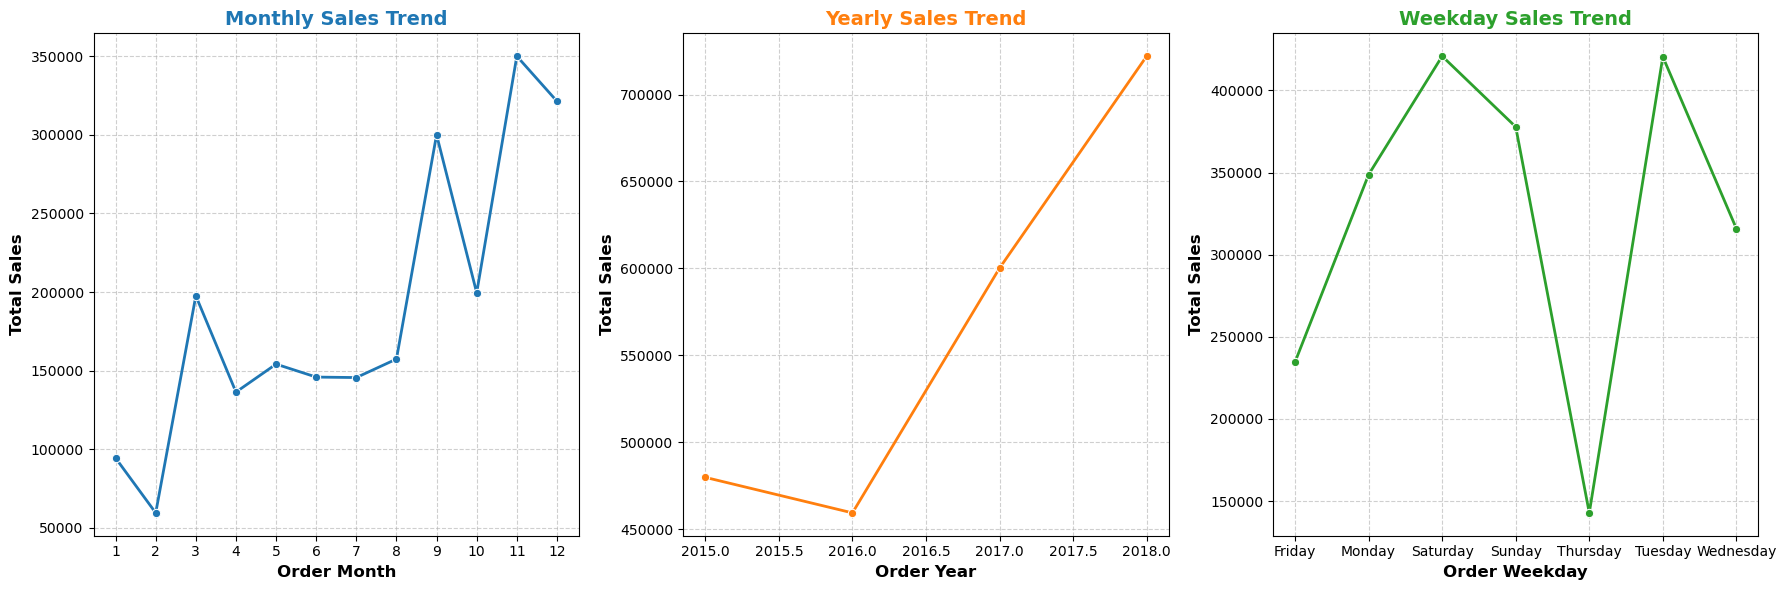

In [ ]:
monthly_sales = df.groupby('Order Month')['Sales'].sum().reset_index()
yearly_sales = df.groupby('Order Year')['Sales'].sum().reset_index()
weekday_sales = df.groupby('Order Weekday')['Sales'].sum().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] 

# Monthly Sales Trend
sns.lineplot(x='Order Month', y='Sales', data=monthly_sales, marker='o', color=colors[0], linewidth=2, ax=axes[0])
axes[0].set_title('Monthly Sales Trend', fontsize=14, fontweight='bold', color=colors[0])
axes[0].set_xlabel('Order Month', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Total Sales', fontsize=12, fontweight='bold')
axes[0].set_xticks(range(1, 13))
axes[0].tick_params(axis='x')
axes[0].grid(True, linestyle='--', alpha=0.6)

# Yearly Sales Trend
sns.lineplot(x='Order Year', y='Sales', data=yearly_sales, marker='o', color=colors[1], linewidth=2, ax=axes[1])
axes[1].set_title('Yearly Sales Trend', fontsize=14, fontweight='bold', color=colors[1])
axes[1].set_xlabel('Order Year', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Total Sales', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x')
axes[1].grid(True, linestyle='--', alpha=0.6)

# Weekday Sales Trend
sns.lineplot(x='Order Weekday', y='Sales', data=weekday_sales, marker='o', color=colors[2], linewidth=2, ax=axes[2])
axes[2].set_title('Weekday Sales Trend', fontsize=14, fontweight='bold', color=colors[2])
axes[2].set_xlabel('Order Weekday', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Total Sales', fontsize=12, fontweight='bold')
axes[2].tick_params(axis='x')
axes[2].grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

----------
**Observations**

**Seasonal Sales Trends (Monthly)**
- Sales peak between September and December every year.
- Possible reasons: Holiday season, Black Friday, Christmas sales boost.
- Recommendation: Focus marketing campaigns and stock management for Q4.

**Yearly Growth Analysis**

- Sales volume increased rapidly after 2016.
- Indicates business expansion, better customer acquisition, or market growth.
- Suggestion: Analyze post-2016 changes (new products, promotions, regional growth).

**Weekly Sales Performance**
- Peak sales days: Saturday & Tuesday.
- Moderate sales: Monday & Sunday.
- Likely reasons: Weekend shopping habits, online sale spikes.
- Suggestion: Optimize promotions and advertising on peak days.
-----------
**Monthly Sales Trend**
- Sales are lower from January to August.
- Seasonal effect: Fewer major shopping events.
- Post-holiday slump: Reduced spending after December peak.

**Suggestions**
- Launch off-season promotions in Q1-Q3.
- Introduce flash sales or discount bundles in slow months.
- Leverage back-to-school sales in July-August to boost revenue.
 
**Weekly Sales Performance**
- Friday, Tuesday, and Wednesday have lower sales.
- Midweek slump: People are focused on work/school.
- Less weekend impulse buying.

**Suggestions**
- Offer weekday discounts (e.g., "Tuesday Saver Deals").
- Target ads on social media midweek to drive engagement.
- Introduce "Flash Friday" deals to improve Friday sales.

**Yearly Sales Growth**
- Sales volume in 2015 & 2016 was too low.
- Early-stage business growth.
- Limited marketing or fewer product offerings.

**Suggestions**
- Analyze what changed after 2016 to improve sales.
- Identify successful marketing strategies post-2016.
- Use historical data to find demand patterns and optimize future strategies.
-------------

 Ship Mode vs. Delivery Time
🔹 Goal: Analyze the relationship between shipping mode & delivery time.
Analysis:

python
Copy
Edit
df['Delivery Time'] = (df['Ship Date'] - df['Order Date']).dt.days
df.groupby('Ship Mode')['Delivery Time'].mean().plot(kind='bar')
🔹 Insight: Find which shipping mode delivers fastest.

3️⃣ Customer Segment vs. Sales
🔹 Goal: Find which customer segment spends the most.
Analysis:

python
Copy
Edit
df.groupby('Segment')['Sales'].sum().plot(kind='bar', figsize=(10,5))
🔹 Insight: Helps in targeted marketing for high-value segments.

4️⃣ Category vs. Sales
🔹 Goal: Identify which product categories generate the most revenue.
Analysis:

python
Copy
Edit
df.groupby('Category')['Sales'].sum().plot(kind='bar', figsize=(8,4))
🔹 Insight: Helps in optimizing inventory & promotions.

5️⃣ Region vs. Sales
🔹 Goal: Compare sales performance across different regions.
Analysis:

python
Copy
Edit
df.groupby('Region')['Sales'].sum().plot(kind='bar')
🔹 Insight: Identify high-performing regions for expansion.

6️⃣ City vs. Sales
🔹 Goal: Find top-selling cities.

python
Copy
Edit
df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
🔹 Insight: Helps in regional marketing strategies.

7️⃣ Order Quantity vs. Sales (Price Sensitivity)
🔹 Goal: Check if higher order quantity leads to higher revenue.
Analysis:

python
Copy
Edit
import seaborn as sns
sns.scatterplot(x=df['Sales'], y=df['Order ID'].map(df['Order ID'].value_counts()))
🔹 Insight: Helps in discount strategy decisions.

